<a href="https://colab.research.google.com/github/beatriz0freitas/PL/blob/main/PL_EX03_Finite_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX03: Finite Automata

## Language Processing

## LEI/2025-26

#### Nuno Macedo
Universidade do Minho


📌 Throughout this worksheet, the [`automata`](https://caleb531.github.io/automata/) Python module is used to draw and manipulate automata. This is not part of the syllabus, and exercises are supposed to be solved with pen and paper.

In [5]:
%pip install -q pygraphviz automata-lib coloraide

Note: you may need to restart the kernel to use updated packages.


# Deterministic Finite Automata

- Finite automata consist of a set of states and state transitions triggered by symbols of an alphabet $\Sigma$

- They are a formalism that enable the recognition of regular languages, equivalent to regular expressions

- In determinstic finite automata (DFAs), for each state and symbol there is at most on target state



In [7]:
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA

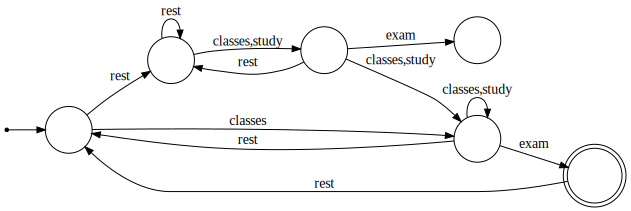

In [ ]:
NFA(
    states={'🤔', '😩', '😀', '🤑', '😴', '💀'},
    input_symbols={'study', 'classes', 'rest', 'exam'},
    transitions={
        '😀': {'classes': '🤔', 'rest': '😴'} ,
        '🤔': {'classes': '🤔', 'study': '🤔', 'exam': '🤑', 'rest': '😀'},
        '😴': {'classes': '😩', 'study': '😩', 'rest': '😴'},
        '🤑': {'rest': '😀' },
        '😩': {'exam': '💀','study': '🤔', 'classes': '🤔', 'rest': '😴'} },
    initial_state='😀',
    final_states={'🤑'}).show_diagram()

## Exercise 1

For each of the DFAs for $\Sigma=\{0,1\}$ shown bellow:

- Give examples of words that are accepted, and words that are rejected by the DFA
- Describe the language recognized by the DFA
- Write a regular expression that recognizes the same language as the DFA

## Exercise 1.1

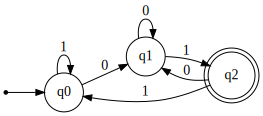

In [ ]:
DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q1', '1': 'q0'},
        'q1': {'0': 'q1', '1': 'q2'},
        'q2': {'0': 'q1', '1': 'q0'} },
    initial_state='q0',
    final_states={'q2'}).show_diagram()

## Exercise 1.2

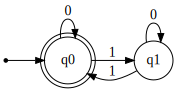

In [ ]:
DFA(
    states={'q0', 'q1'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q1', '1': 'q0'} },
    initial_state='q0',
    final_states={'q0'}).show_diagram()

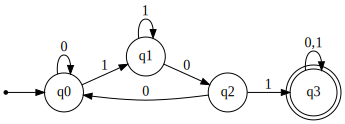

In [ ]:
DFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q2', '1': 'q1'},
        'q2': {'0': 'q0', '1': 'q3'},
        'q3': {'0': 'q3', '1': 'q3'} },
    initial_state='q0',
    final_states={'q3'}).show_diagram()

## Exercise 2

Write DFAs over $\Sigma = \{ 0, 1 \}$ to recognize the following languages.

## Exercise 2.1

All bitstrings that end in `011`.

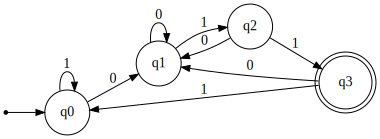

In [8]:
DFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'1': 'q0', '0': 'q1'},
        'q1': {'1': 'q2', '0': 'q1'},
        'q2': {'0': 'q1', '1': 'q3'},
        'q3': {'0': 'q1', '1': 'q0'} },
    initial_state='q0',
    final_states={'q3'}).show_diagram()

## Exercise 2.2

All bitstrings that represent an even decimal number.

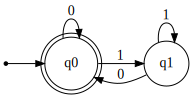

In [9]:
DFA(
    states={'q0', 'q1'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'1': 'q1', '0': 'q0'} },
    initial_state='q0',
    final_states={'q0'}).show_diagram()

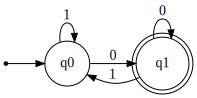

In [10]:
DFA(
    states={'q0', 'q1'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'1': 'q0', '0': 'q1'},
        'q1': {'0': 'q1', '1': 'q0'} },
    initial_state='q0',
    final_states={'q1'}).show_diagram()

## Exercise 2.3

All bitstrings that represent a decimal number that is divisible by 3.

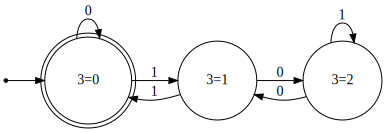

In [11]:
DFA(
    states={'%3=0', '%3=1', '%3=2'},
    input_symbols={'0', '1'},
    transitions={
        '%3=0': {'0': '%3=0', '1': '%3=1'},
        '%3=1': {'1': '%3=0', '0': '%3=2'},
        '%3=2': {'1': '%3=2', '0': '%3=1'} },
    initial_state='%3=0',
    final_states={'%3=0'}).show_diagram()

## Exercise 2.4

All bitstrings whose last two symbols are equal.

# Exercise 3

Consider a controller of a simple vending machine.

## Exercise 3.1

The vending machine accepts only coins of 5 and 10 units of money, and sells only coffee, which costs 20 units. Any other coins beyond 20 units are rejected by the machine.

There are 4 events in this machine that trigger state changes:
  - insertion of a coin of 5 or 10 units
  - selection of coffee
  - delivery of the product by the machine

Write a DFA that represents the behavior of this controller.

## Exercise 3.2

Consider now that the vending machine also sells tea at the price of 15 units of money, but that the machine does not give back change.

There is now one additional event that triggers a change of state, selecting tea instead of coffee.

Adapt the previous  DFA to consider this behavior.

# Exercise 4

Consider a simple controller for an elevator between 3 floors. At each moment, the elevator's door may be open or closed, and it can only move when the door is closed. When it reaches a floor, the door immediately opens, and then closes after some time.

This controller has 4 events that make its state change:
- 3 floor buttons that can be pressed by users
- A timer that makes the door close

Draw a DFA that models this controller.

# Exercise 5

Consider the following *incomplete* DFA (i.e., transitions are not defined for some pairs of states/symbols).

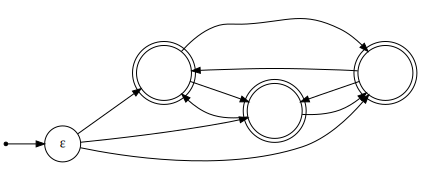

In [ ]:
_tokens = { '🔴', '🟢', '🟡' }
_states = _tokens | { 'ε' }
dfa = DFA(
    states=_states,
    allow_partial=True,
    input_symbols=_tokens,
    transitions={ s : { i:i for i in _tokens-{s} } for s in _states},
    initial_state='ε',
    final_states=_tokens)
dfa.show_diagram()

## Exercise 5.1

What is the language recognized by this DFA?

## Exercise 5.2

Convert this incomplete DFA into an equivalent *complete* DFA (i.e., that recognizes the same language).

## Exercise 5.3

Draw an automaton that accepts the *complement* of the language recognized by the given automaton. The complement of a language $L$ is the set of all words not accepted by $L$, that is, $\Sigma^* \backslash L$.

Try to think of a strategy that can be applied to any DFA.

-- Nuno Macedo